In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
def process_csv(path, label):
    df = pd.read_csv(path)
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df = df.sort_values('Timestamp').reset_index(drop=True)

    # Take middle 150 runs
    middle_start = (len(df) - 150) // 2
    middle_df = df.iloc[middle_start:middle_start + 150].copy()

    # Reset run number to 1 through 150
    middle_df['Run #'] = range(1, 151)

    middle_df['Source'] = label
    return middle_df[['Run #', 'Confidence', 'Source']]

In [ ]:
csv1 = process_csv("results/recognition_log_train_jenna_correct_camera.csv", "Good Conditions")
csv2 = process_csv("results/recognition_log_train_jenna_wrong_camera.csv", "Bad Conditions")
csv3 = process_csv("results/recognition_log_train_jenna_hat_on.csv", "Ok Conditions")

# Combine for plotting
combined_df = pd.concat([csv1, csv2, csv3])

In [23]:
combined_df

,Run #,Confidence,Source
318,1,55.46,Good Camera
319,2,57.23,Good Camera
320,3,52.85,Good Camera
321,4,55.85,Good Camera
322,5,55.93,Good Camera
...,...,...,...
254,146,62.41,Hat On
255,147,63.68,Hat On
256,148,63.87,Hat On
257,149,67.54,Hat On


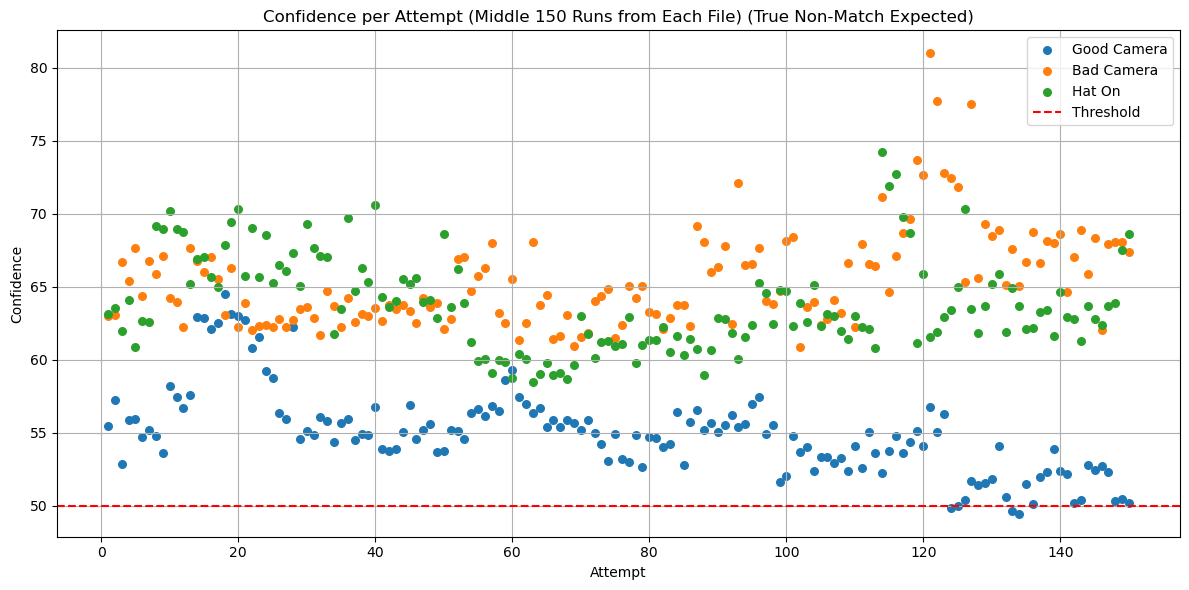

In [24]:
# Plot
plt.figure(figsize=(12, 6))
for label in combined_df['Source'].unique():
    subset = combined_df[combined_df['Source'] == label]
    plt.scatter(subset['Run #'], subset['Confidence'], label=label, s=30)

# Add threshold line
plt.axhline(y=50, color='red', linestyle='--', label='Threshold')

# Labels and legend
plt.xlabel("Attempt")
plt.ylabel("Confidence")
plt.title("Confidence per Attempt (Middle 150 Runs from Each File) (True Non-Match Expected)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

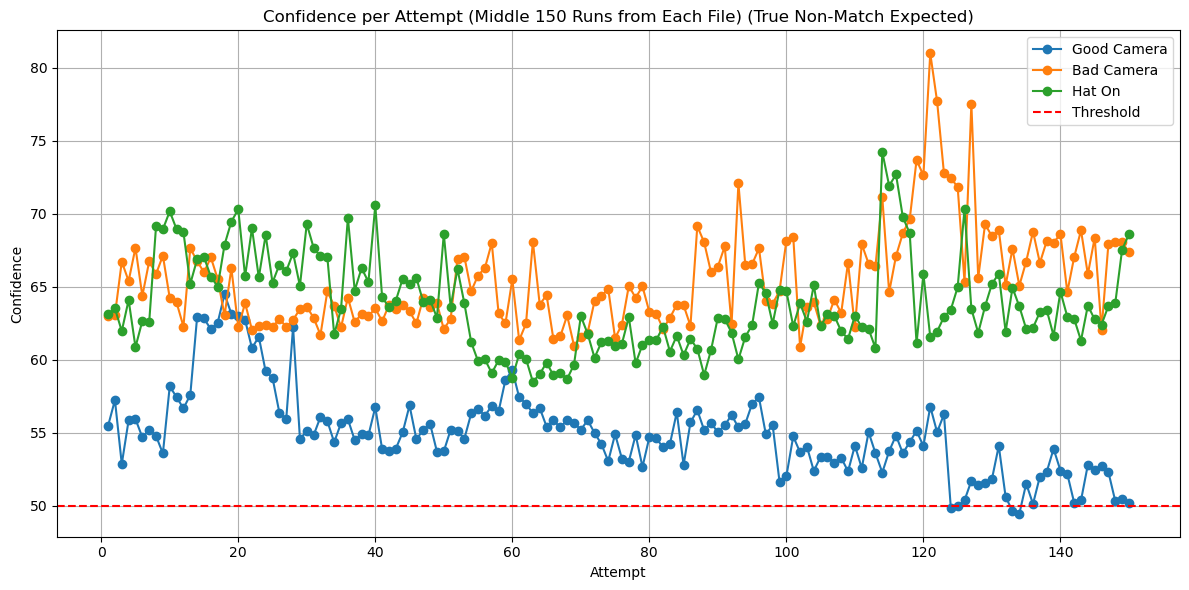

In [25]:
# Plot
plt.figure(figsize=(12, 6))
for label in combined_df['Source'].unique():
    subset = combined_df[combined_df['Source'] == label]
    plt.plot(subset['Run #'], subset['Confidence'], label=label, marker='o')

# Add threshold line
plt.axhline(y=50, color='red', linestyle='--', label='Threshold')

# Labels and legend
plt.xlabel("Attempt")
plt.ylabel("Confidence")
plt.title("Confidence per Attempt (Middle 150 Runs from Each File) (True Non-Match Expected)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()